In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate base relationship

In [6]:
np.random.seed(42)
temperatures = np.random.uniform(15, 35, 20)
# Base relationship: ~20 sales per degree + random noise
sales = 20 * temperatures + np.random.normal(0, 80, 20) + 100

# Plot

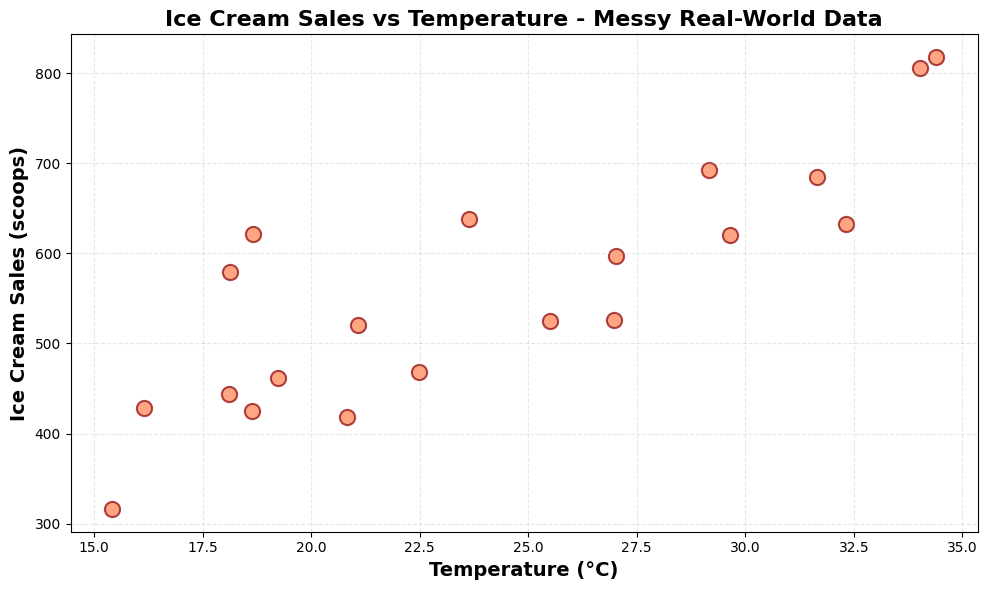

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, sales, color='coral', s=120, alpha=0.7, edgecolors='darkred', linewidths=1.5)
plt.xlabel('Temperature (°C)', fontsize=14, fontweight='bold')
plt.ylabel('Ice Cream Sales (scoops)', fontsize=14, fontweight='bold')
plt.title('Ice Cream Sales vs Temperature - Messy Real-World Data', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Linear Regression Algo

## Compute Gradients

In [8]:
def compute_gradient(x, y, w, b):
    N = len(y)
    y_pred = w * x + b
    error = y_pred - y
    dw = (2/N) * np.dot(error, x)
    db = (2/N) * np.sum(error)
    return dw, db

## New slope and intercept

In [9]:
def find_new_slope_intercept(w, b, alpha):
    dw, db = compute_gradient(temperatures, sales, w, b)
    w_new = w - alpha * dw
    b_new = b - alpha * db
    return w_new, b_new

## Minimize Loss Function

In [16]:
w_init = 0.0
b_init = 0.0
alpha = 0.001
num_iterations = 1000

def minimize_cost(temperatures, sales, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    x = temperatures
    y = sales

    for i in range(num_iterations):
        y_pred = w * x + b
        cost = (1/len(y)) * np.sum((y_pred - y) ** 2)

        print(f"Iteration {i+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

        if(cost < 1e-6):
            print("Convergence reached.")
            print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")
            break

        w, b = find_new_slope_intercept(w, b, alpha)

    return w, b

w_final, b_final = minimize_cost(temperatures, sales, w_init, b_init, alpha, num_iterations)

Iteration 1: Cost = 331541.0960, w = 0.0000, b = 0.0000
Iteration 2: Cost = 24763.6337, w = 28.4035, b = 1.1225
Iteration 3: Cost = 6994.2512, w = 21.5669, b = 0.8707
Iteration 4: Cost = 5964.8071, w = 23.2116, b = 0.9496
Iteration 5: Cost = 5904.9744, w = 22.8151, b = 0.9489
Iteration 6: Cost = 5901.3037, w = 22.9098, b = 0.9673
Iteration 7: Cost = 5900.8860, w = 22.8863, b = 0.9812
Iteration 8: Cost = 5900.6568, w = 22.8912, b = 0.9961
Iteration 9: Cost = 5900.4385, w = 22.8893, b = 1.0108
Iteration 10: Cost = 5900.2209, w = 22.8891, b = 1.0256
Iteration 11: Cost = 5900.0034, w = 22.8884, b = 1.0403
Iteration 12: Cost = 5899.7860, w = 22.8879, b = 1.0550
Iteration 13: Cost = 5899.5686, w = 22.8873, b = 1.0698
Iteration 14: Cost = 5899.3513, w = 22.8867, b = 1.0845
Iteration 15: Cost = 5899.1340, w = 22.8861, b = 1.0992
Iteration 16: Cost = 5898.9168, w = 22.8856, b = 1.1140
Iteration 17: Cost = 5898.6996, w = 22.8850, b = 1.1287
Iteration 18: Cost = 5898.4825, w = 22.8844, b = 1.1434

# Plot the best fit line

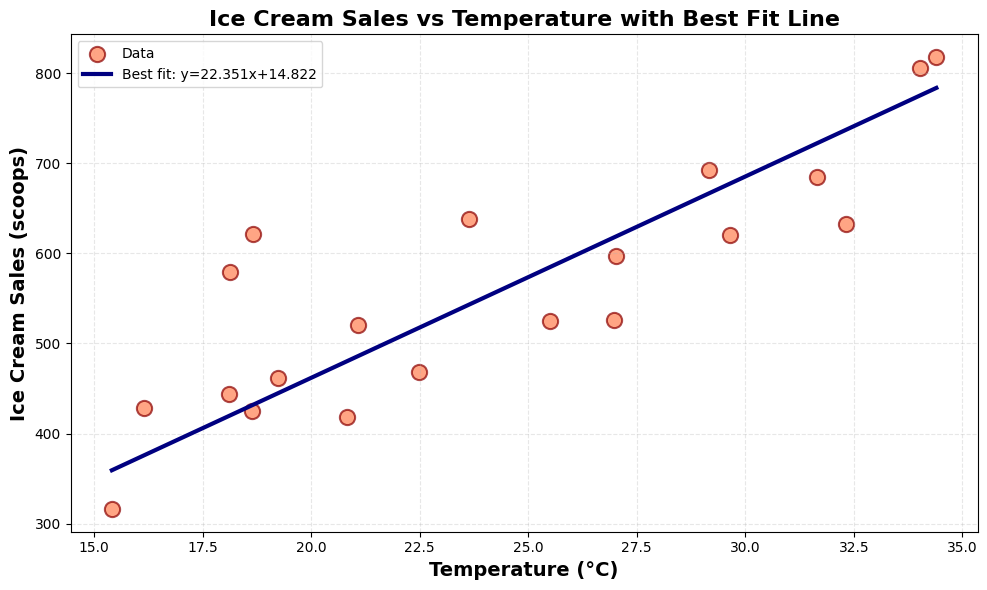

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, sales, color='coral', s=120, alpha=0.7, edgecolors='darkred', linewidths=1.5, label='Data')
x_line = np.linspace(temperatures.min(), temperatures.max(), 100)
y_line = w_final * x_line + b_final
plt.plot(x_line, y_line, color='navy', linewidth=3, label=f'Best fit: y={w_final:.3f}x+{b_final:.3f}')
plt.xlabel('Temperature (°C)', fontsize=14, fontweight='bold')
plt.ylabel('Ice Cream Sales (scoops)', fontsize=14, fontweight='bold')
plt.title('Ice Cream Sales vs Temperature with Best Fit Line', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()